In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
import scipy
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [2]:
read_me=sklearn.datasets.fetch_california_housing().DESCR
print(read_me)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
df_x, MedHouseVal=sklearn.datasets.fetch_california_housing(as_frame=True, return_X_y=True)

In [4]:
MedHouseVal.head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


In [5]:
df_primary = df_x.join(MedHouseVal, how='inner')
df_primary.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [6]:
# Пропусков нет!
print(df_primary.info())
df_primary.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


## 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_x = df_primary.drop(labels='MedHouseVal', axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_x, MedHouseVal, test_size=0.2, random_state=1982)

## 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model_l=LinearRegression()

In [12]:
model_l.fit(x_train, y_train)

LinearRegression()

In [13]:
y_predict_train=model_l.predict(x_train)
y_predict_test=model_l.predict(x_test)

In [14]:
print(f'r2_score на обучающей выборке: {metrics.r2_score(y_train, y_predict_train)}')
print(f'r2_score на тестовой выборке:{metrics.r2_score(y_test, y_predict_test)}')
print(f'RMSE на обучающей выборке: {np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))}')
print(f'RMSE на тестовой выборке:{np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))}')
print(f'MAE на обучающей выборке: {metrics.mean_absolute_error(y_train, y_predict_train)}')
print(f'MAE на тестовой выборке:{metrics.mean_absolute_error(y_test, y_predict_test)}')

r2_score на обучающей выборке: 0.6047453083568017
r2_score на тестовой выборке:0.6116588851058382
RMSE на обучающей выборке: 0.7236067584729523
RMSE на тестовой выборке:0.726406490691454
MAE на обучающей выборке: 0.5309526704718819
MAE на тестовой выборке:0.5330251139122199


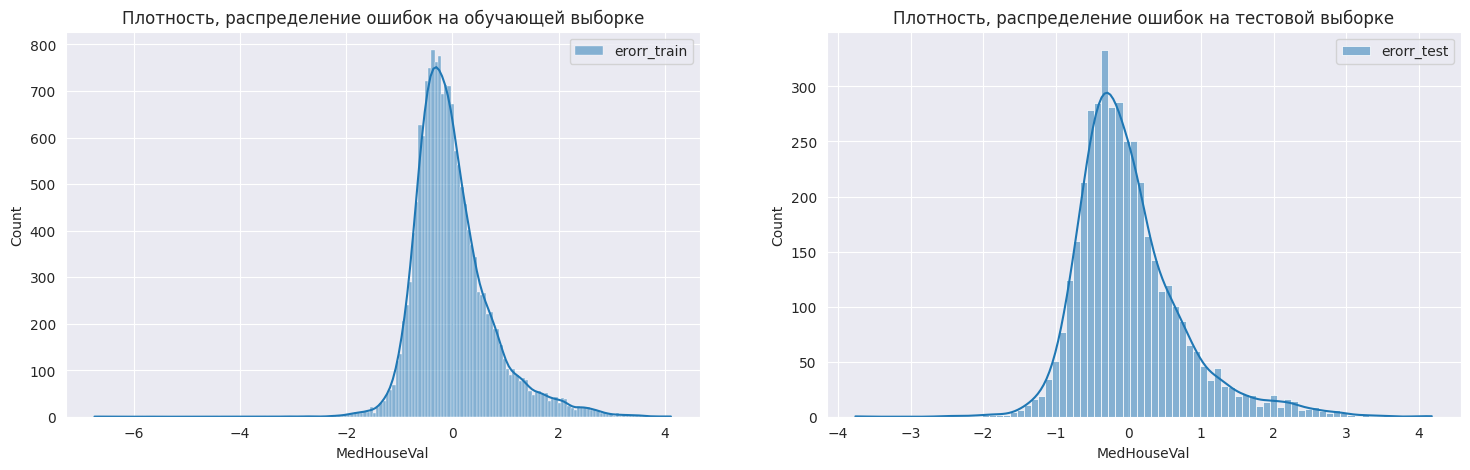

In [15]:
erorr_train=y_train - y_predict_train
erorr_test=y_test - y_predict_test
sns.set_style('darkgrid')
plt.figure(figsize=(18, 5), )
plt.subplot(1,2,1)
plt.title('Плотность, распределение ошибок на обучающей выборке')
sns.histplot(erorr_train, kde=True, label='erorr_train')
plt.legend()
plt.subplot(1,2,2)
plt.title('Плотность, распределение ошибок на тестовой выборке')
sns.histplot(erorr_test, kde=True, label='erorr_test')
plt.legend();

## 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы

In [16]:
import scipy

In [17]:
stats, p_value = scipy.stats.shapiro(df_primary['MedHouseVal'].values)
if p_value > 0.05:
  print('Нормальное распределение', {p_value})
else:
  print(f'Распределение ненормальное, {p_value}')

Распределение ненормальное, 1.3673019915893023e-74


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


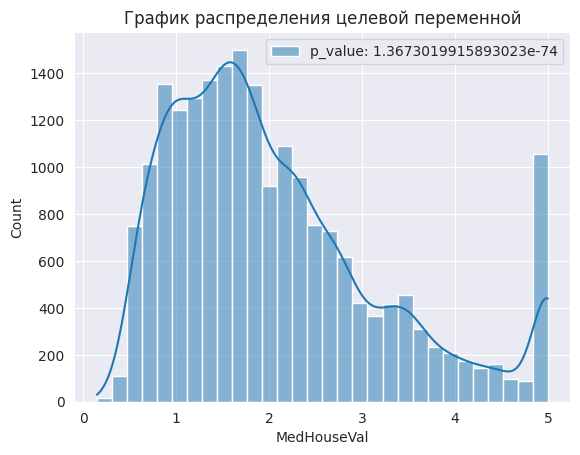

In [18]:
#Распределение ненормальное, выбросы присутствуют
sns.histplot(data=df_primary, x='MedHouseVal', kde=True, bins=30, label=f'p_value: {p_value}')
plt.legend()
plt.title('График распределения целевой переменной');

##6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

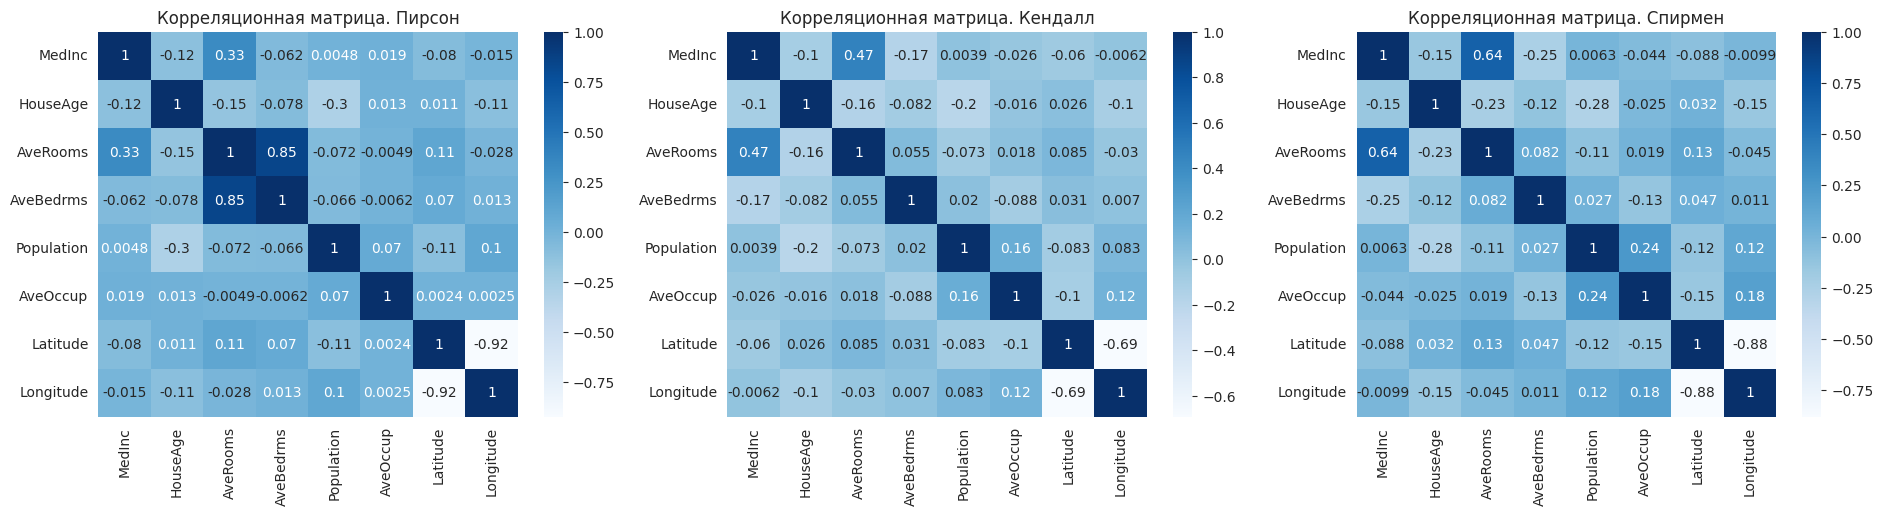

In [19]:
matrix_corr_pearson = df_x.corr(method='pearson')
matrix_corr_kendall = df_x.corr(method='kendall')
matrix_corr_speaman = df_x.corr(method='spearman')
plt.figure(figsize=(23, 5))
plt.subplot(1,3,1)
sns.heatmap(matrix_corr_pearson, annot=True, cmap='Blues')
plt.title('Корреляционная матрица. Пирсон')
plt.subplot(1,3,2)
sns.heatmap(matrix_corr_kendall, annot=True, cmap='Blues')
plt.title('Корреляционная матрица. Кендалл')
plt.subplot(1,3,3)
sns.heatmap(matrix_corr_speaman, annot=True, cmap='Blues')
plt.title('Корреляционная матрица. Спирмен');

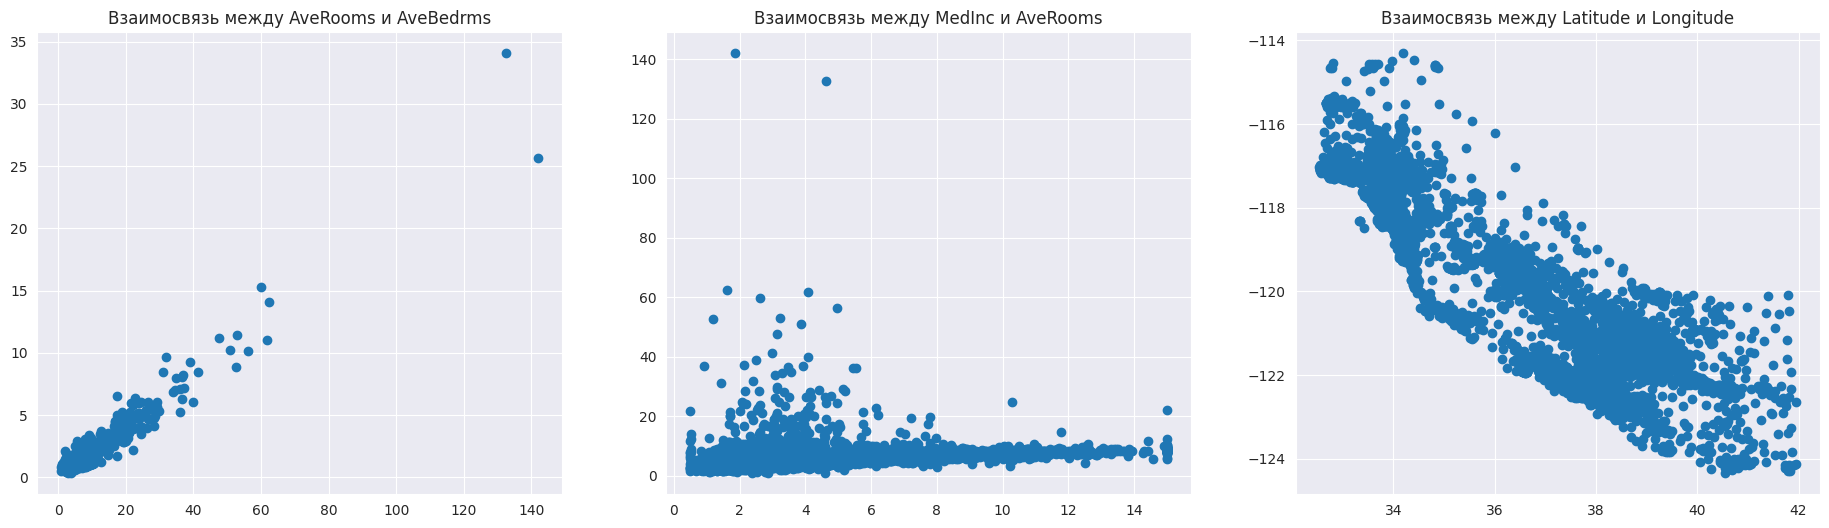

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(23,6))
ax[2].scatter(df_x['Latitude'], df_x['Longitude'])
ax[2].set_title('Взаимосвязь между Latitude и Longitude')
ax[0].scatter(df_x['AveRooms'], df_x['AveBedrms'])
ax[0].set_title('Взаимосвязь между AveRooms и AveBedrms')
ax[1].scatter(df_x['MedInc'], df_x['AveRooms'])
ax[1].set_title('Взаимосвязь между MedInc и AveRooms');

In [21]:
#    a. Сделайте выводы.
#    Высокоая положительная корреляция по Пирсону между AveRooms и AveBedrms. - 0.85. По Кендаллу и Спирмену корреляция слабая.
#    Высокая отрицательная коррелляция по Пирсону и всеми ранговыми коэффициентами (Спирмен, Кендалл) между такими признаками как Latitude и Longitude

In [22]:
df_primary.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
#    b. Удалите признаки на основании полученных значений, выводов.
#    удаляю признаки - Longitude, AveBedrms
df_temp_1 = df_primary.drop(labels=['Longitude', 'AveBedrms'], axis=1)

In [24]:
df_temp_1.head(3)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521


In [25]:
#    c. Повторите п. 3, п. 4 на измененных данных.

In [26]:
def model(df, target='MedHouseVal', model=LinearRegression(), random_st=1982):

  """Функция для расчёта метрик линейной регрессии, автоматическое разделение признаков и целейвой переменной"""
  x_df=df.drop(labels=[target], axis=1)
  target=df[target]

  x_train, x_test, y_train, y_test = train_test_split(x_df, target, test_size=0.2, random_state=random_st)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  r2_train = metrics.r2_score(y_train, y_pred_train)
  r2_test = metrics.r2_score(y_test, y_pred_test)
  rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
  rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

  df_metrics_model=pd.DataFrame({'R2': [r2_train, r2_test], 'RMSE': [rmse_train, rmse_test], 'MAE': [mae_train, mae_test]}, index=['train', 'test'])

  return df_metrics_model

In [27]:
def model_x_y(x, y, model=LinearRegression(), random_st=1982):
  """ Функция для ручного формирования датафрейма с признаками и целевой переменной """

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_st)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  r2_train = metrics.r2_score(y_train, y_pred_train)
  r2_test = metrics.r2_score(y_test, y_pred_test)
  rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
  rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

  df_metrics_model=pd.DataFrame({'R2': [r2_train, r2_test], 'RMSE': [rmse_train, rmse_test], 'MAE': [mae_train, mae_test]}, index=['train', 'test'])

  return df_metrics_model

In [28]:
# СРАВНЕНИЕ МЕТРИК/ Чем больше признаков я удаляю, тем модель становится хуже(((
model_primary = model(df_primary, 'MedHouseVal')
model_del_col = model(df_temp_1, 'MedHouseVal')
print(f'Метрики ДО УДАЛЕНИЯ признака(признаков)\n{model_primary}\n')
print(f'Метрики ПОСЛЕ УДАЛЕНИЯ признака(признаков)\n{model_del_col}')

Метрики ДО УДАЛЕНИЯ признака(признаков)
             R2      RMSE       MAE
train  0.604745  0.723607  0.530953
test   0.611659  0.726406  0.533025

Метрики ПОСЛЕ УДАЛЕНИЯ признака(признаков)
             R2      RMSE       MAE
train  0.519508  0.797824  0.594581
test   0.526147  0.802407  0.596176


## 7. Исследуйте оставленные признаки на выбросы.

### ГИСТОГРАММЫ

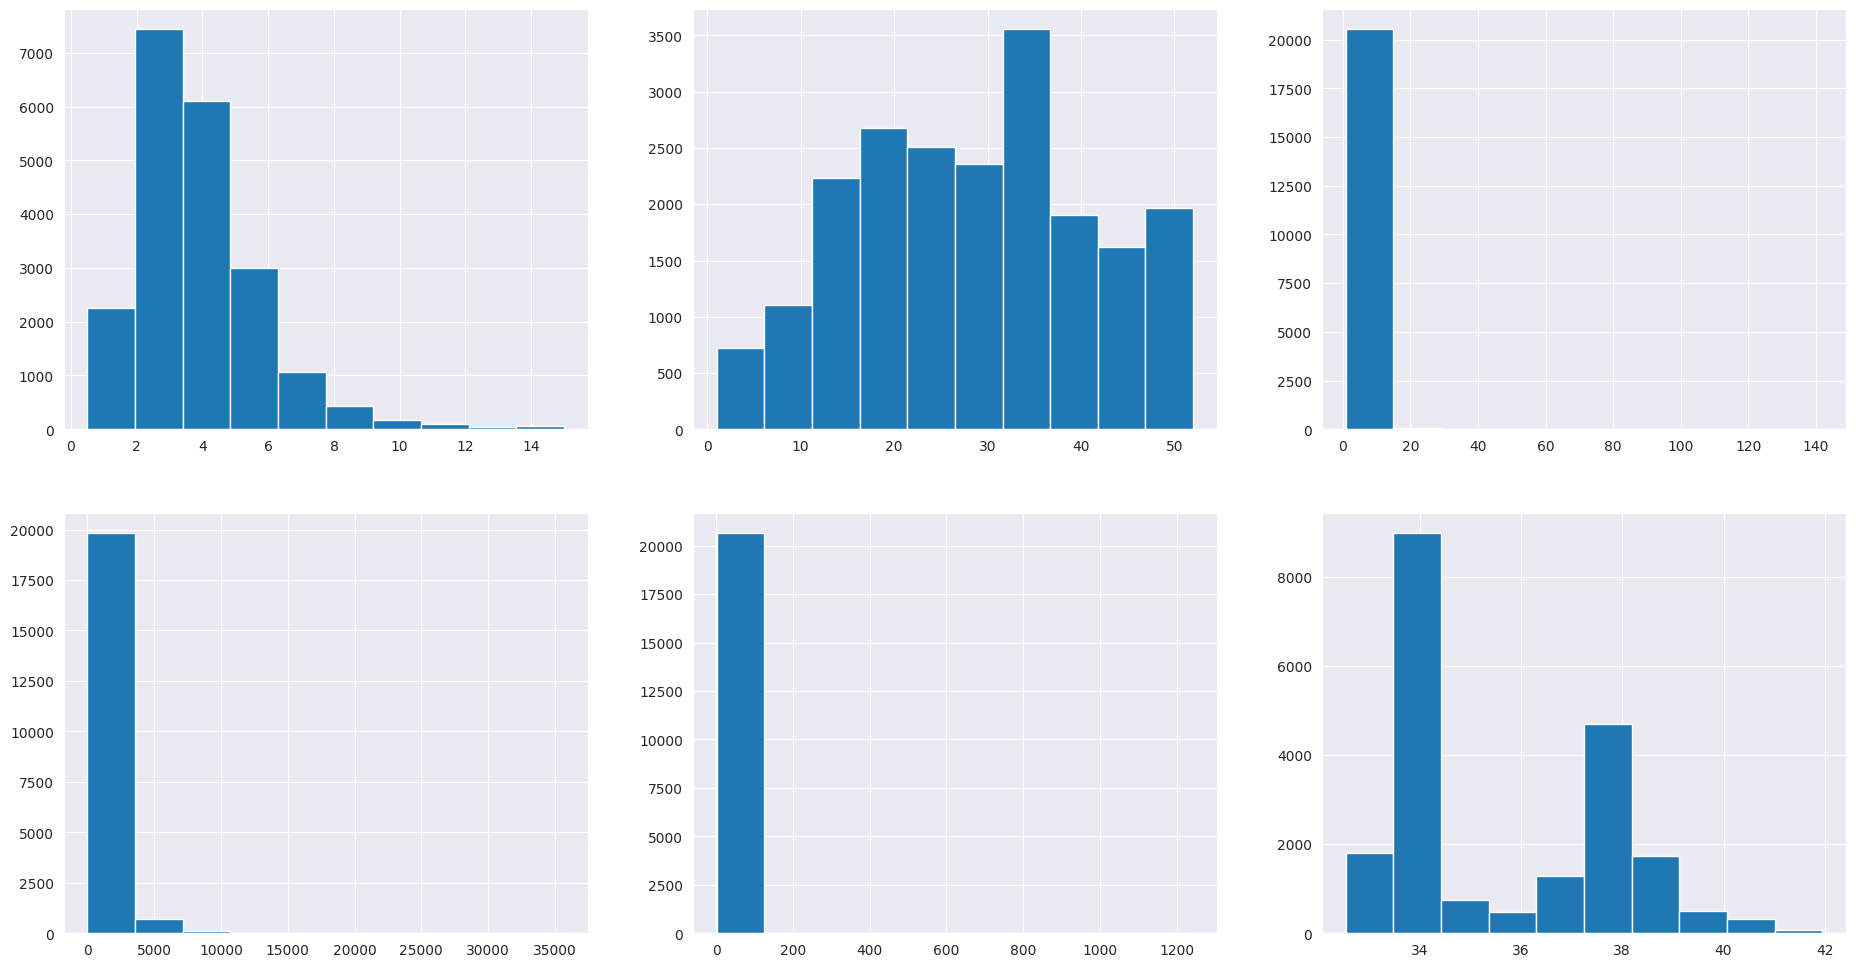

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(23,12))
ax[0,0].hist(df_temp_1['MedInc'])
ax[0,1].hist(df_temp_1['HouseAge'])
ax[0,2].hist(df_temp_1['AveRooms'])
ax[1,0].hist(df_temp_1['Population'])
ax[1,1].hist(df_temp_1['AveOccup'])
ax[1,2].hist(df_temp_1['Latitude']);

### БОКСПЛОТ

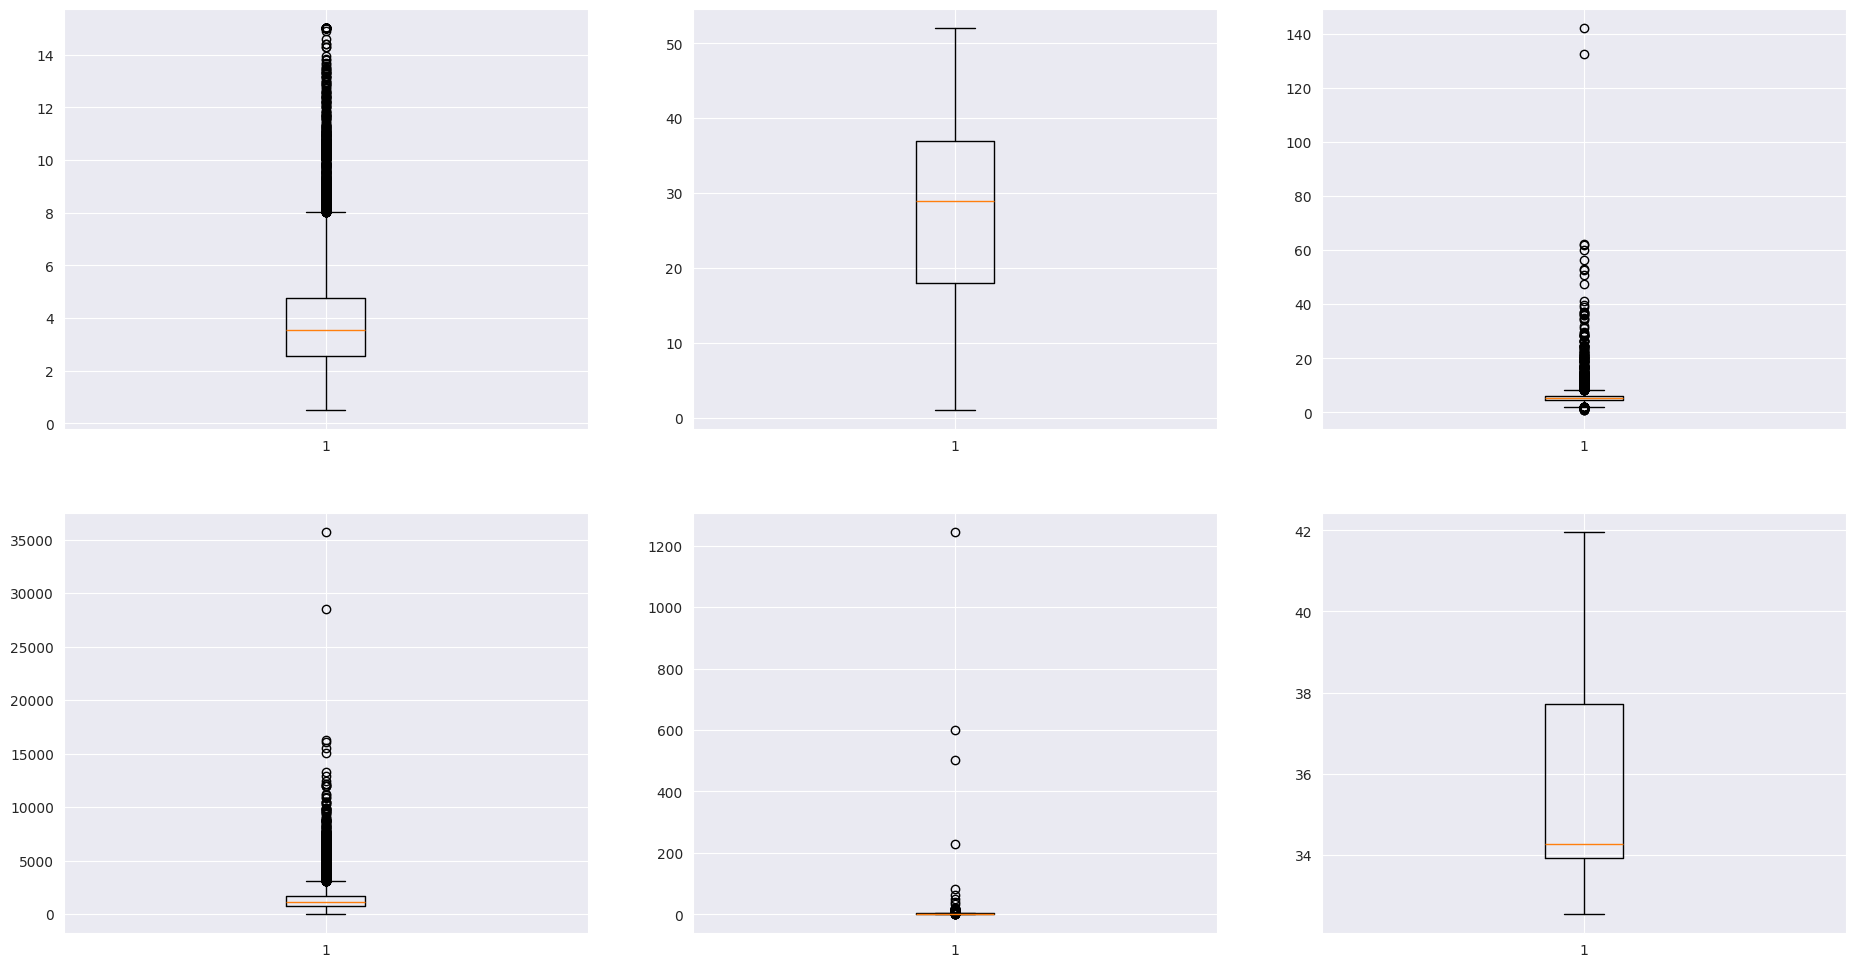

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(23,12))
ax[0,0].boxplot(df_temp_1['MedInc'])
ax[0,1].boxplot(df_temp_1['HouseAge'])
ax[0,2].boxplot(df_temp_1['AveRooms'])
ax[1,0].boxplot(df_temp_1['Population'])
ax[1,1].boxplot(df_temp_1['AveOccup'])
ax[1,2].boxplot(df_temp_1['Latitude']);

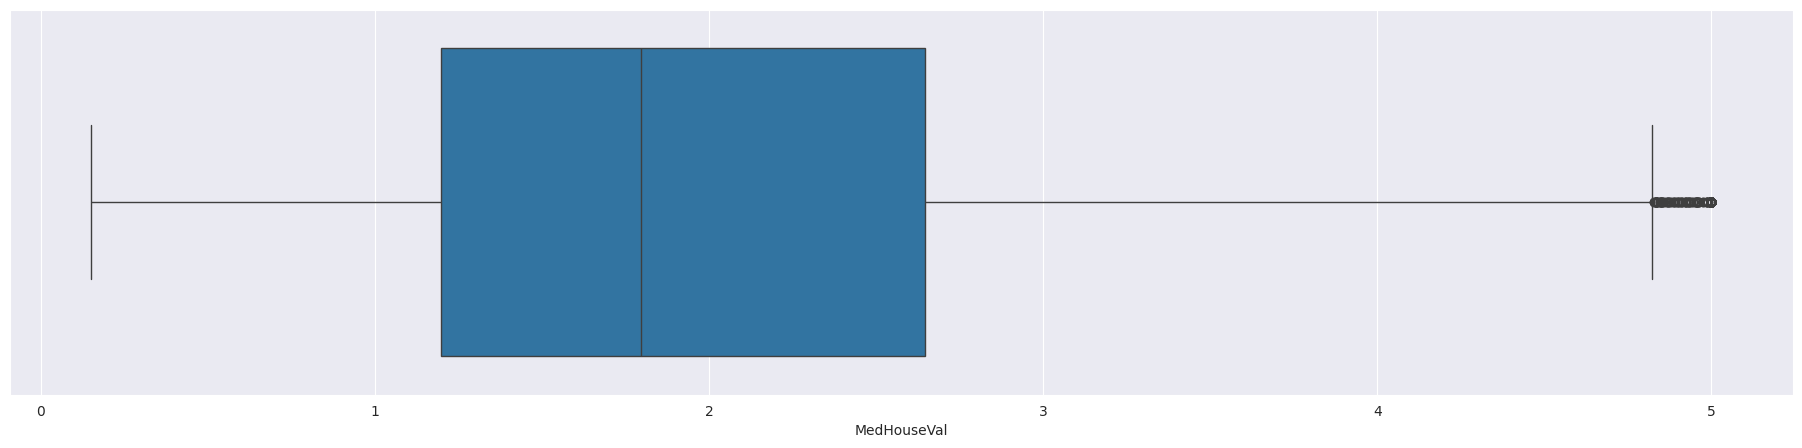

In [31]:
plt.figure(figsize=(23, 5))
sns.boxplot(data=df_primary, x='MedHouseVal');

### Формирование и удаление выбросов

In [32]:
# Функция для поиска выбросов. Возвращает одномерный массив
def outlier(DF, col, outlier=None):
    q_1, q_3 = DF[col].quantile(0.25), DF[col].quantile(0.75)
    iqr = q_3-q_1
    lower_outlier = q_1-1.5*iqr
    upper_outlier = q_3+1.5*iqr
    array_outlier = np.array([upper_outlier, lower_outlier])
    if outlier is None:
      return array_outlier
    if outlier == 'up':
      return upper_outlier
    if outlier == 'low':
      return lower_outlier

In [33]:
dict_outlier = {}
for col in df_temp_1:
  val_outlier = df_temp_1.loc[(df_temp_1[col] >= outlier(df_temp_1, col, 'low')) & (df_temp_1[col] >= outlier(df_temp_1, col, 'up'))].shape[0]
  dict_outlier.setdefault(col, val_outlier)

df_outlier = pd.DataFrame(dict_outlier, index=range(1))

In [34]:
# ДАТАФРЕЙМ С РЕЗУЛЬТАТАМИ ПО КОЛИЧЕСТВУ ВЫБРОСОВ по методу ТЬЮКИ -
sum_outlier = df_outlier.values.sum()
print(f'Количество выбросов по методу Тьюки: {sum_outlier}')
df_outlier

Количество выбросов по методу Тьюки: 4120


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,681,0,466,1198,704,0,1071


In [35]:
outlier(df_primary, 'MedHouseVal')

array([ 4.824125, -0.980875])

In [36]:
# УДАЛЕНИЕ ВСЕХ ВЫБРОСОВ. Способ на основе z - оценок.
# Данный способ потходит если распределение нормальное.
# Использую в качестве примера. Данный способ
z_deviation = scipy.stats.zscore(df_temp_1)# Z оценки/ Выброс более 2.7 z-оценок будут считаться как выбросами

In [37]:
z_deviation.head(3)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.974429,-0.049597,1.052548,2.129631
1,2.332238,-0.607019,0.327041,0.861439,-0.092512,1.043185,1.314156
2,1.782699,1.856182,1.155620,-0.820777,-0.025843,1.038503,1.258693


In [38]:
# Фильтрация и формирование нового датафрейма из признаков на ОСНОВЕ Z оценки.
df_temp_Z = df_temp_1[(z_deviation<3.5).all(axis=1)]

In [39]:
print(f'При использовании Z-Оценки < 3 было удалено {df_temp_1.shape[0]-df_temp_Z.shape[0]} выброса')

При использовании Z-Оценки < 3 было удалено 589 выброса


In [40]:
# РУЧНОЕ УДАЛЕНИЕ ВЫБРОСОВ
df_temp_2 = df_temp_1.loc[(df_temp_1['AveRooms']<80) & (df_temp_1['Population']<15000) & (df_temp_1['AveOccup']<200)]

In [41]:
print(f'При ручном удалено {df_temp_1.shape[0]-df_temp_2.shape[0]} выброса')

При ручном удалено 12 выброса


### Оценка моделей после удаления выбросов

In [42]:
# Первичная модель
model_primary

,R2,RMSE,MAE
train,0.604745,0.723607,0.530953
test,0.611659,0.726406,0.533025


In [43]:
# Модель после удаления столбцов МRMSE и MAE стала хуже
model_del_col

,R2,RMSE,MAE
train,0.519508,0.797824,0.594581
test,0.526147,0.802407,0.596176


In [44]:
# Модель после удаления выбросов с помощью Z-оценок <3 RMSE и	MAE стала лучше предыдущих моделей. Средняя квадратичная и абсолютная ошибки становяться меньше, но r2 - ХУЖЕ.
model_del_outlier_z = model(df_temp_Z, 'MedHouseVal')
model_del_outlier_z

,R2,RMSE,MAE
train,0.564644,0.744750,0.545613
test,0.571156,0.725212,0.536103


In [45]:
# Модель после ручного удаления выбросов ХУЖЕ чем при помощи Z-оценки, но лучше остальных предыдущих.
# ОСТАВЛЯЮ РУЧНОЙ ВАРИАНТ УДАЛЕНИЯ.
model_del_manual_outlier = model(df_temp_2)
model_del_manual_outlier

,R2,RMSE,MAE
train,0.540540,0.781636,0.572921
test,0.565279,0.762575,0.568086


## 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [46]:
# df_temp_1.head(3)  # датафрейм после удаления столбцов(признаков)
# df_temp_2.head(3)  # датафрейм после удаления пропусков (ручной выбор удаления)
# df_temp_Z.head(3)  # датафрейм после удаления пропусков (на основе z-оценок)

In [47]:
def qcut_interval_min_max(df, col, new_col_min=f'min_{col}', new_col_max=f'max_{col}', quan=10):
  """Функция формирует интервалы по децилям, затем формирует два столбца с макс и мин значениями полученных ранее интервалов"""
  name_col_min=f'min_{col}'
  name_col_max=f'max_{col}'
  new_df = df.copy()
  new_df[col]=pd.qcut(new_df[col], q=quan)
  new_df[name_col_min]=new_df[col].apply(lambda x: x.left)
  new_df[name_col_max]=new_df[col].apply(lambda x: x.right)
  new_df=new_df.drop(labels=col, axis=1)
  return new_df

In [48]:
def exp(df, col, new_col=f'exp_{col}'):
  """вычисляет значения в нат.логарифм: np.log(x)"""
  name_col=f'exp_{col}'
  new_df = df.copy()
  new_df[name_col]=new_df[col].apply(lambda x: np.log(x))
  new_df=new_df.drop(labels=col, axis=1)
  return new_df

In [49]:
def normalization(df, col, new_col=f'normal_{col}'):
  """нормализует значения"""
  name_col=f'normal_{col}'
  new_df = df.copy()
  max_= np.max(new_df[col])
  min_= np.min(new_df[col])
  new_df[name_col]=new_df[col].apply(lambda x: (x - min_)/(max_-min_))
  new_df=new_df.drop(labels=col, axis=1)
  return new_df

In [50]:
def degree(df, col, new_col=f'degree_{col}', degree=2):
  """возводит в степень: x**degree)"""
  name_col=f'degree_{col}'
  new_df = df.copy()
  new_df[name_col]=new_df[col].apply(lambda x: x**degree)
  new_df=new_df.drop(labels=col, axis=1)
  return new_df

In [51]:
# МОДЕЛЬ ДО ПРЕОБРАЗОВАНИЯ ПРИЗНАКОВ
model(df_temp_2)

,R2,RMSE,MAE
train,0.540540,0.781636,0.572921
test,0.565279,0.762575,0.568086


In [52]:
# Признак AveOccup qcut + min max
# После преобразования признака модель стала чуть лучше
df_temp_3 = qcut_interval_min_max(df_temp_2, 'AveOccup')

In [53]:
model(df_temp_3)

,R2,RMSE,MAE
train,0.606741,0.723136,0.53451
test,0.618164,0.714687,0.53089


In [54]:
# Для признака AveRooms выполнил натуральный логарифм
# После преобразования признака модель стала чуть лучше
df_temp_4 = exp(df_temp_3, 'AveRooms')

In [55]:
model(df_temp_4)

,R2,RMSE,MAE
train,0.611874,0.718401,0.528224
test,0.622872,0.710266,0.524910


In [56]:
# Для признака Population выполнил нормализацию
# После преобразования признака модель не изменилась
df_temp_5 = normalization(df_temp_4, 'Population')

In [57]:
model(df_temp_5)

,R2,RMSE,MAE
train,0.611874,0.718401,0.528224
test,0.622872,0.710266,0.524910


In [58]:
# Для признака Latitude применил возведение в куб
# После преобразования признака модель чуть-чуть улучшилась
df_temp_6 = degree(df_temp_5, 'Latitude', degree=2)

In [59]:
model(df_temp_6)

,R2,RMSE,MAE
train,0.612168,0.718129,0.527977
test,0.623109,0.710043,0.524687


In [60]:
# Итоговый датафрейм после преобразования данных
df_temp_6.head()

,MedInc,HouseAge,MedHouseVal,min_AveOccup,max_AveOccup,exp_AveRooms,normal_Population,degree_Latitude
0,8.3252,41.0,4.526,2.511,2.667,1.943640,0.024079,1434.8944
1,8.3014,21.0,3.585,2.075,2.339,1.830682,0.181008,1433.3796
2,7.2574,52.0,3.521,2.667,2.818,2.114825,0.037213,1432.6225
3,5.6431,52.0,3.413,2.511,2.667,1.760845,0.041893,1432.6225
4,3.8462,52.0,3.422,2.075,2.339,1.837665,0.042421,1432.6225


## Реализация полиномиальной регрессии

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=True)

In [99]:
# датафрейм с признаками где большое число выбросов.
X = df_temp_6.drop(labels='MedHouseVal', axis=1)
Y = df_temp_6['MedHouseVal']

In [95]:
poly_x = poly.fit_transform(X)

In [100]:
# degree=4 (данный код нужен для построения графика. Желательно написать функцию. А лучше КЛАСС)
x3_train, x3_test, y3_train, y3_test = train_test_split(X, Y, test_size=0.2, random_state=1982)
poly_x3_train = poly.fit_transform(x3_train)
poly_x3_test = poly.fit_transform(x3_test)

ml_Ridge = Ridge(alpha=10)
ml_Ridge.fit(poly_x3_train, y3_train)
y_pred_ridge = ml_Ridge.predict(poly_x3_test)

,R2,RMSE,MAE
train,0.705729,0.625539,0.448271
test,0.703498,0.629783,0.455290


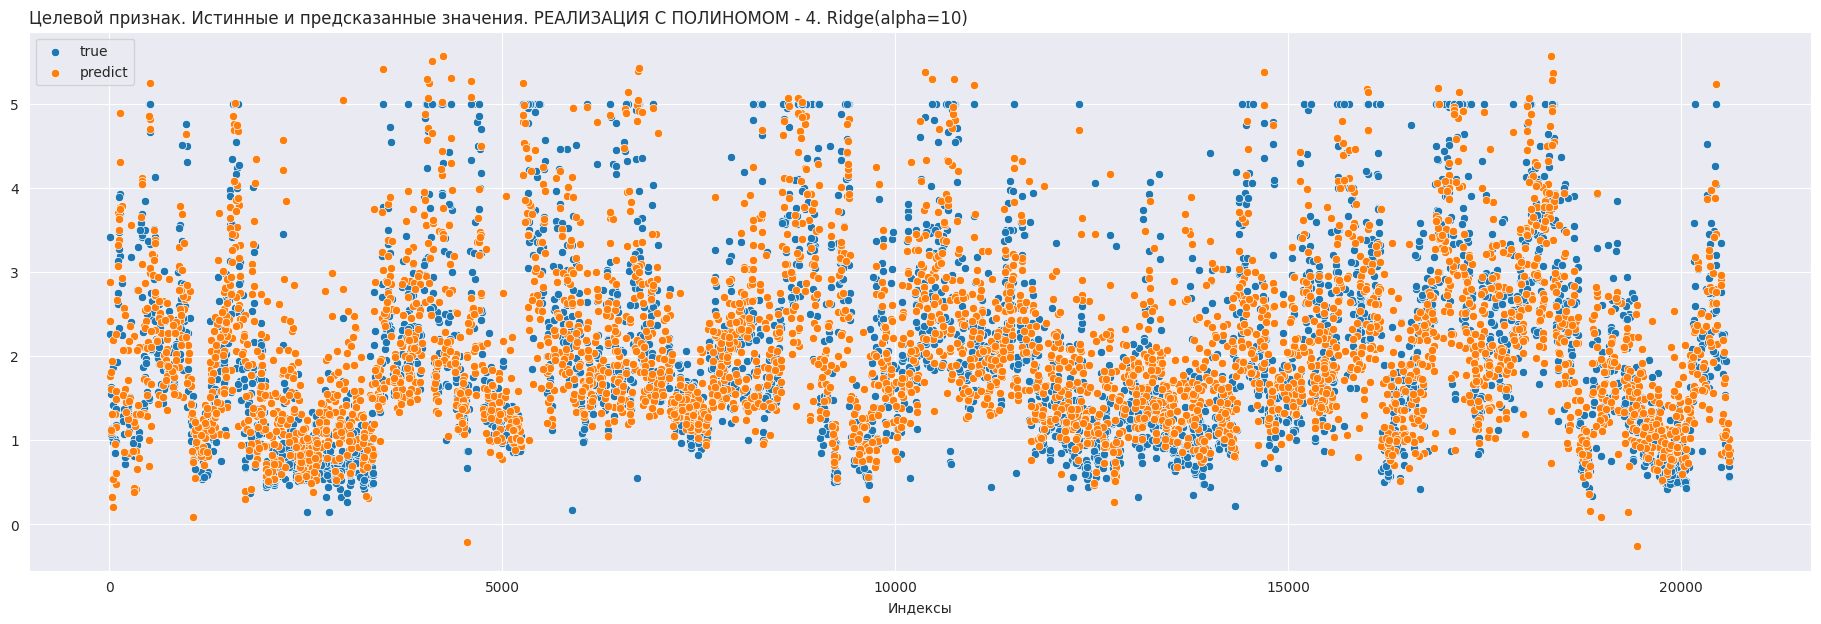

In [104]:
plt.figure(figsize=(23, 7))
plt.title('Целевой признак. Истинные и предсказанные значения. РЕАЛИЗАЦИЯ С ПОЛИНОМОМ - 4. Ridge(alpha=10)', loc='left')
sns.scatterplot(x=x3_test.index, y=y3_test.values, label='true')
sns.scatterplot(x=y3_test.index, y=y_pred_ridge, label='predict')
plt.legend()
plt.xlabel('Индексы');

model_poly = model_x_y(poly_x, Y, model=Ridge(alpha=10))
model_poly

## 9. Сформулируйте выводы по проделанной работе.

In [67]:
# ПЕРВИЧНАЯ МОДЕЛЬ ДО ВСЕХ ПРЕОБРАЗОВАНИЙ.
model(df_primary)

,R2,RMSE,MAE
train,0.604745,0.723607,0.530953
test,0.611659,0.726406,0.533025


In [68]:
# МОДЕЛЬ ПОСЛЕ УДАЛЕНИЯ СТОЛБЦОВ. МОДЕЛЬ ХУЖЕ ПЕРВИЧНОЙ
model(df_temp_1)

,R2,RMSE,MAE
train,0.519508,0.797824,0.594581
test,0.526147,0.802407,0.596176


In [69]:
# МОДЕЛЬ ПОСЛЕ РУЧНОГО УДАЛЕНИЯ ВЫБРОСОВ. МОДЕЛЬ СТАЛА ЛУЧШЕ, НО ХУЖЕ ПЕРВИЧНОЙ МОДЕЛИ
model(df_temp_2)

,R2,RMSE,MAE
train,0.540540,0.781636,0.572921
test,0.565279,0.762575,0.568086


In [70]:
# ПОСЛЕ ПРЕОБРАЗОВАНИЙ ПРИЗНАКОВ МОДЕЛЬ СТАЛА ЛУЧШЕ + НЕМНОГО ЛУЧШЕ ЧЕМ ПЕРВИЧНАЯ МОДЕЛЬ.
model(df_temp_6)

,R2,RMSE,MAE
train,0.612168,0.718129,0.527977
test,0.623109,0.710043,0.524687


In [88]:
# При использовании полиномиальной регрессии модель удалось еще улучшить. При увеличении степени полинома более 3, то
# показатели тестовой выборки значительно ухудшаются за исключением тренировочной (модель значительно переобучается)
# ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ DEGREE = 2
model_poly

,R2,RMSE,MAE
train,0.705729,0.625539,0.448271
test,0.703498,0.629783,0.455290


In [72]:
""" НАЛИЧИЕ ОГРОМНОГО ЧИСЛА ВЫБРОСОВ, ДАЖЕ ПОСЛЕ РУЧНОГО УДАЛЕНИЯ И/ИЛИ ПРИ ПОМОЩИ Z-ОЦЕНОК ФОРМИРУЮТСЯ ВЫБОРКИ С ДРУГИМИ ВЫБРОСАМИ. У 4 ПРИЗНАКОВ РАСПРЕДЕЛЕНИЕ НЕНОРМАЛЬНОЕ + БОЛЬШОЕ ЧИСЛО ВЫБРОСОВ.
МОДЕЛЬ СЛОЖНО ОБУЧИТЬ ЛИНЕЙНОЙ РЕГРЕССИЕЙ"""

' НАЛИЧИЕ ОГРОМНОГО ЧИСЛА ВЫБРОСОВ, ДАЖЕ ПОСЛЕ РУЧНОГО УДАЛЕНИЯ И/ИЛИ ПРИ ПОМОЩИ Z-ОЦЕНОК ФОРМИРУЮТСЯ ВЫБОРКИ С ДРУГИМИ ВЫБРОСАМИ. У 4 ПРИЗНАКОВ РАСПРЕДЕЛЕНИЕ НЕНОРМАЛЬНОЕ + БОЛЬШОЕ ЧИСЛО ВЫБРОСОВ.\nМОДЕЛЬ СЛОЖНО ОБУЧИТЬ ЛИНЕЙНОЙ РЕГРЕССИЕЙ'

,R2,RMSE,MAE
train,0.611311,0.718922,0.528852
test,0.621743,0.711329,0.526591


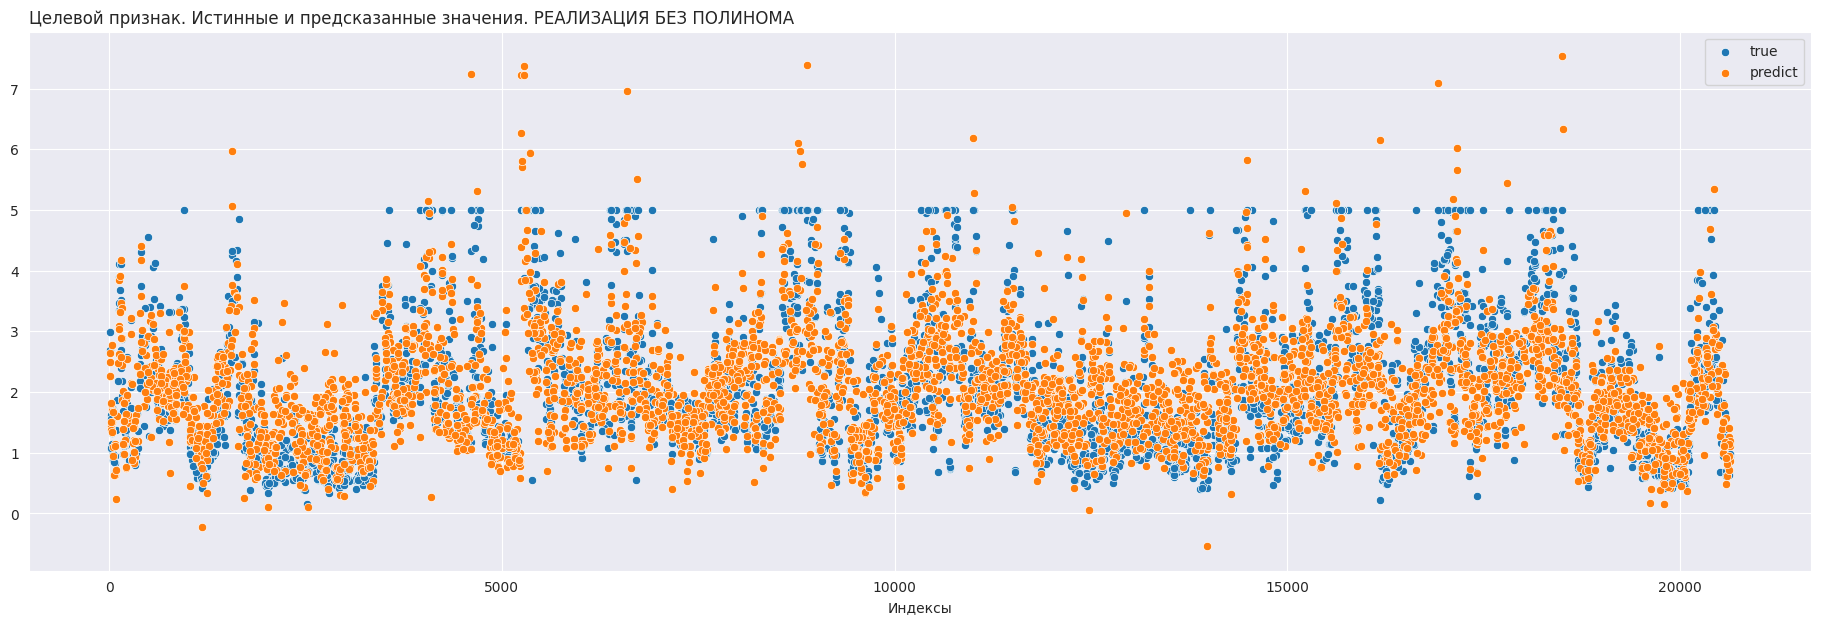

In [77]:
# ГРАФИКИ МОДЕЛИ. ИСТОЧНИК: df_temp_6

ml=Ridge(alpha=0.001)
x2=df_temp_6.drop(labels='MedHouseVal', axis=1)
y2=df_temp_6['MedHouseVal']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=5)
ml.fit(x2_train, y2_train)
y_predict = ml.predict(x2_test)

plt.figure(figsize=(23, 7))
plt.title('Целевой признак. Истинные и предсказанные значения. РЕАЛИЗАЦИЯ БЕЗ ПОЛИНОМА', loc='left')
sns.scatterplot(x=y2_test.index, y=y2_test.values, label='true')
sns.scatterplot(x=y2_test.index, y=y_predict, label='predict')
plt.legend()
plt.xlabel('Индексы');

model(df_temp_6, model=Ridge(alpha=100))